# Feature Engineering

## **Polynomial Features**
Polynomial features: are a feature engineering technique in machine learning where new features are created by taking powers and interaction terms of the original features. This expands the feature space, enabling linear models to capture nonlinear relationships between variables.

---
## **When to Use Polynomial Features**

- When a linear model underfits the data.
- When the relationship between input and output is nonlinear.
- When you want to capture interaction effects between features.
- In regression tasks where polynomial regression is needed.
---
## **Why Use Polynomial Features**

- **Capture Nonlinear Relationships**: Turns a linear model into a flexible curve-fitting model.
- **Feature Interactions**: Polynomial terms include cross-terms like x1⋅x2x_1 \cdot x_2x1⋅x2, helping models learn interactions between variables.
- **Simple to Implement**: Just a transformation step, no need to switch to more complex algorithms.
- **Works with Linear Models**: Lets you keep the simplicity and efficiency of linear regression/logistic regression while improving accuracy.
---
## **When Not to Use Polynomial Features**

- **High-dimensional data**: Feature explosion leads to computational inefficiency.
- **Noise-sensitive datasets**: High-degree polynomials can overfit noisy data.
- **Better alternatives**: Sometimes, decision trees, SVMs, or neural networks can model nonlinearity better.
---

### Polynomial feature in expansion:

In [29]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
# Create a simple dataset
X = np.array([[2], [3], [4]])
# Instantiate PolynomialFeatures (degree = 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
# Transform dataset
X_poly = poly.fit_transform(X)
print("Original X:\n", X)
print("Polynomial Features:\n", X_poly)

Original X:
 [[2]
 [3]
 [4]]
Polynomial Features:
 [[ 2.  4.]
 [ 3.  9.]
 [ 4. 16.]]


### Using Polynomial feature in regression

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Sample dataset
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 5, 10, 17, 26])  # Quadratic pattern
# Create a pipeline with PolynomialFeatures and LinearRegression
model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
# Train the model
model.fit(X, y)
# Predictions
y_pred = model.predict(X)
print("Predictions:", y_pred)


Predictions: [ 2.  5. 10. 17. 26.]


---
## Interaction terms

Interaction terms in linear regression are variables created by multiplying two or more independent variables. They are used to capture the combined effect of these variables on the dependent variable, allowing the relationship between predictors and the target to vary depending on each other.

**When to Use:**

- **Non-Parallel Relationships:** When the effect of one predictor on the target variable changes at different levels of another predictor.
- **Moderation Effects:** When one variable moderates the effect of another on the dependent variable.
- **Complex Relationships:** When simple additive models fail to capture the complexity of relationships between predictors and the target.

---
**Why Use:**

- **Capture Complex Relationships:** Interaction terms allow models to account for situations where the effect of one variable depends on another.
- **Improve Model Accuracy:** Including interaction terms can lead to better-fitting models that more accurately reflect the underlying data.
- **Enhanced Interpretability:** They provide insights into how variables jointly influence the outcome, offering a deeper understanding of the data.

---

**Limitations of Interaction Terms**

- **Increased Model Complexity:** Adding interaction terms increases the number of predictors, which can lead to overfitting if not handled properly.
- **Multicollinearity:** Interaction terms can introduce multicollinearity, making it difficult to interpret individual coefficients.
- **Interpretation Challenges:** The presence of interaction terms complicates the interpretation of main effects, as the effect of one variable depends on the level of another.

---

C:\Users\ASUS1\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     19.67
Date:                Tue, 19 Aug 2025   Prob (F-statistic):              0.164
Time:                        11:40:05   Log-Likelihood:                -18.152
No. Observations:                   5   AIC:                             44.30
Df Residuals:                       1   BIC:                             42.74
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           179.1667     37.960      4.720

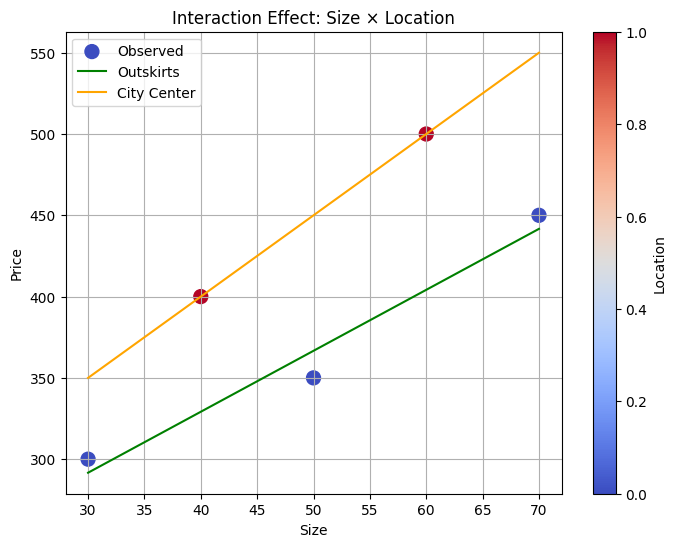

In [34]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Sample data
data = {
    'Size': [30, 40, 50, 60, 70],
    'Location': [0, 1, 0, 1, 0],
    'Price': [300, 400, 350, 500, 450]
}
df = pd.DataFrame(data)
df['Size_Location'] = df['Size'] * df['Location']

# Original predictors
X = df[['Size', 'Location', 'Size_Location']]
X = sm.add_constant(X)
y = df['Price']

# Fit OLS model
model = sm.OLS(y, X).fit()
print(model.summary())

# -------------------------
# Create prediction DataFrames with SAME columns as X
# -------------------------
size_range = np.linspace(df['Size'].min(), df['Size'].max(), 100)

# For Location = 0
loc0 = pd.DataFrame({
    'const': 1,  # intercept
    'Size': size_range,
    'Location': 0,
    'Size_Location': size_range * 0
})
pred0 = model.predict(loc0)

# For Location = 1
loc1 = pd.DataFrame({
    'const': 1,  # intercept
    'Size': size_range,
    'Location': 1,
    'Size_Location': size_range * 1
})
pred1 = model.predict(loc1)

# -------------------------
# Plot
# -------------------------
plt.figure(figsize=(8,6))
plt.scatter(df['Size'], df['Price'], c=df['Location'], cmap='coolwarm', s=100, label='Observed')
plt.plot(size_range, pred0, color='green', label='Outskirts')
plt.plot(size_range, pred1, color='orange', label='City Center')
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Interaction Effect: Size × Location')
plt.legend()
plt.colorbar(label='Location')
plt.grid(True)
plt.show()


**Code explination:**
- **Import libraries** → Load `pandas`, `numpy`, `statsmodels`, and `matplotlib` for data handling, regression, and plotting.
- **Create dataset** → Build a small table with `Size`, `Location`, and `Price`.
- **Interaction term** → Add `Size_Location = Size × Location` to capture how Size affects Price differently by Location.
- **Define predictors & target** → `X` has Size, Location, and interaction; `y` is Price. Add a constant for the intercept.
- **Fit regression** → Use OLS to estimate coefficients for Size, Location, and their interaction.
- **Prediction for plotting** → Generate a smooth Size range and calculate predicted Price for Location = 0 and 1.
- **Plot** → Scatter observed points and overlay regression lines for both Location levels to show the interaction effect visually.

## Regularization

Regularization is a technique in machine learning used to prevent overfitting by adding a penalty for model complexity. It discourages the model from fitting noise and outliers in the training data, helping it generalize better and achieve higher accuracy on unseen data.

---
**Types of Regularization:**
1. **Lasso Regression (L1)**
2. **Ridge Regression (L2)**
3. **Elastic Net Regression**

---

1. Lasso Regression (L1)**Lasso Regression**: **LASSO** stands for **(Least Absolute Shrinkage and Selection Operator)**. It is a technique that prevents overfitting by adding a penalty equal to the absolute values of the model coefficients to the loss function. 

**Cost function :**

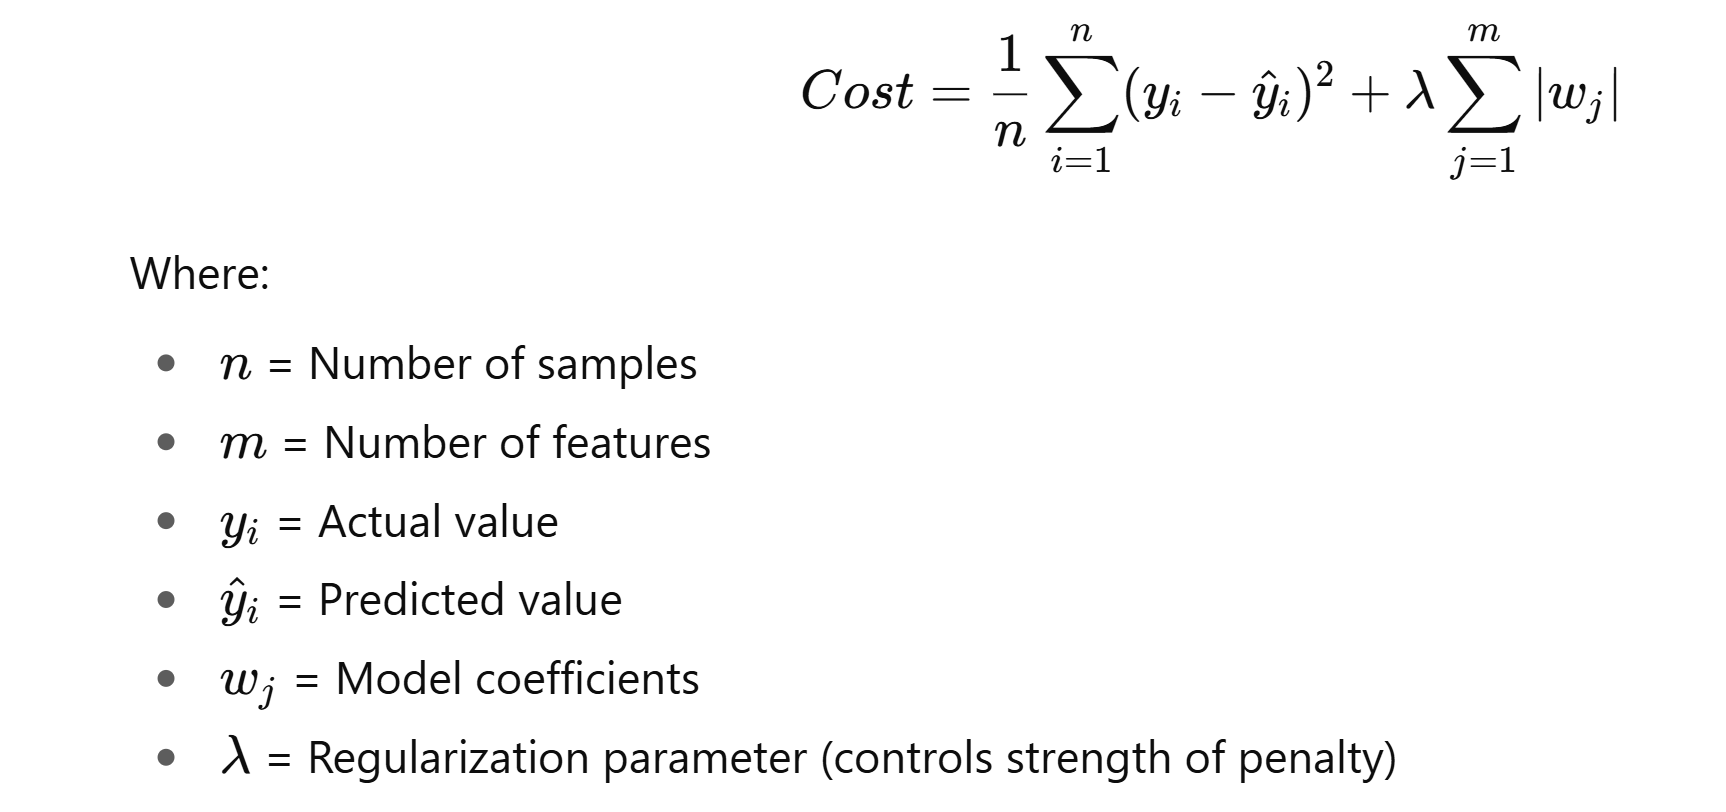

**Properties**
- L1 can shrink some coefficients exactly to zero, automatically ignoring irrelevant features.
- Produces simpler models by reducing number of active features.
- Helps when features are highly correlated by selecting one and shrinking others.
- Small λ → behaves like normal regression (less penalty).
- Large λ → forces coefficients to shrink more, risk of underfitting

---
**Advantages**

- Performs automatic feature selection.
- Prevents overfitting by reducing complexity.
- Produces interpretable models with fewer active features.

---
**Limitations**

- May perform poorly when number of features > number of samples.
- If features are highly correlated, Lasso tends to select only one and ignore others.
- Choice of λ is critical (tuned via cross-validation).
---

In [35]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

# Generate dataset
X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Lasso model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predictions
y_pred = lasso.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
print("Coefficients:", lasso.coef_)


MSE: 0.06362439921332456
Coefficients: [60.50305581 98.52475354 64.3929265  56.96061238 35.52928502]


---
What does the code do?
- Creates a dataset with 100 samples and 5 features.
- Splits it into training (80%) and testing (20%) sets.
- Trains a **Lasso Regression** model, which uses **L1 regularization** to possibly shrink some coefficients to zero.
- Makes predictions on test data.
- Evaluates model performance using **MSE** and prints the learned **coefficients**.


2. **Ridge Regression (L2)** :

L2 Regularization, also called Ridge Regression, adds a penalty to the cost function that is proportional to the square of the magnitude of the coefficients. This helps prevent overfitting by shrinking all coefficients towards zero, but unlike L1 regularization, it does not set any coefficients exactly to zero.

**Cost Function:**
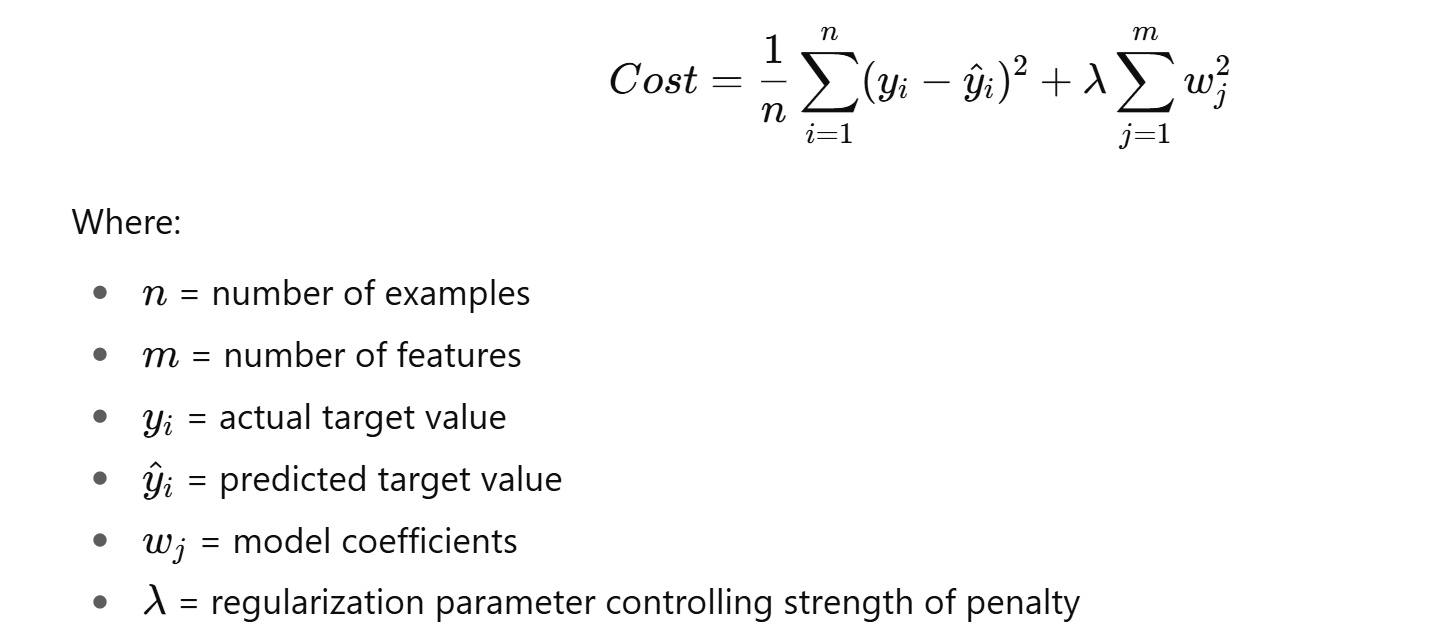

---

**Properties:** 

- Shrinks all coefficients but keeps them non-zero.
- Reduces model complexity and prevents overfitting.
- Helps **handle multicollinearity** by reducing the impact of correlated features.
- Smooths the model, making it less sensitive to noise in training data.

---
### **When to Use**

- When your model is **overfitting** to training data.
- When features are **highly correlated** (multicollinearity).
- When you want **all features to remain in the model**, but with smaller influence.
- Useful for **linear regression models** that need improved generalization.

---
### **Why Use**

- Improves model **generalization** on unseen data.
- Shrinks large coefficients to prevent the model from relying too heavily on certain features.
- More stable than ordinary linear regression when input features are correlated.

---
### **Limitations**

- Does **not perform feature selection**; all coefficients remain in the model.
- Choice of λ is critical; too large → underfitting, too small → overfitting.
- Less interpretable than sparse models (like Lasso) when number of features is high.

---



In [36]:
# Code for Rigid Regression (L2):
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Dataset
X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predictions and evaluation
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Coefficients:", ridge.coef_)



Mean Squared Error: 4.114050771972589
Coefficients: [59.87954432 97.15091098 63.24364738 56.31999433 35.34591136]


---
**What does the code do?**
- Generates a synthetic regression dataset with 100 samples and 5 features.
- Splits the dataset into training (80%) and testing (20%) sets.
- Initializes a **Ridge Regression** model with `alpha=1.0` (L2 regularization strength).
- Trains the model on the training data.
- Predicts target values for the test set.
- Evaluates model performance using **Mean Squared Error (MSE)**.
- Prints the **coefficients** of the features, which are shrunk due to L2 regularization.

**Effect on weights:**

**Weight:** In machine learning, **weights (coefficients)** represent the **importance or influence** of each feature on the predicted output.

---
**How Regularization Affects Weights?**

It adds a penalty to the model’s loss function to **control the size of weights**.

---
**Purpose:**
- Prevent overfitting (large weights make the model too sensitive to training data).
- Encourage simpler models with smaller or zero weights for irrelevant features.

**General form of penalized cost function:**

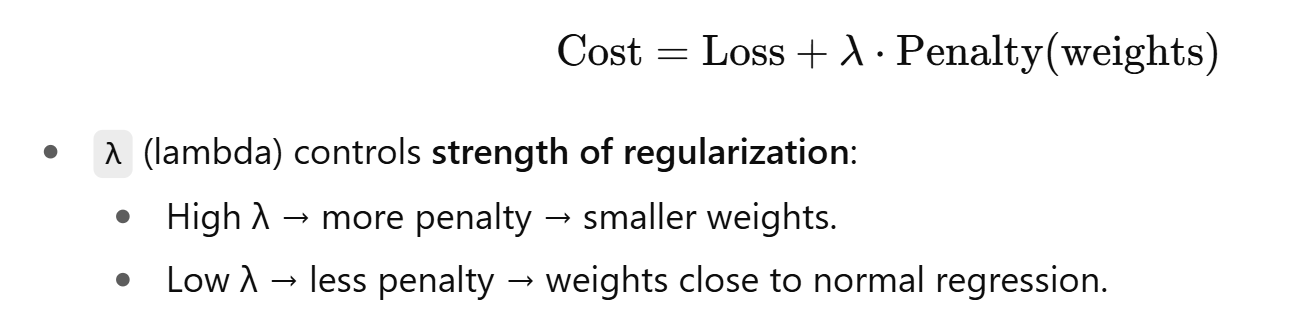

---

**L1 effect on weight:**
- Adds **absolute value** penalty to weights.
- Shrinks some weights **exactly to zero** → feature selection.
- Produces **sparse models**.
- Picks one of correlated features, zeroes out others.

---
**L2 effect on weight:**
- Adds **squared value** penalty to weights.
- Shrinks **all weights proportionally**, none become zero.
- Keeps all features, reduces magnitude of large weights.
- Stabilizes coefficients when features are correlated.

In [39]:
# Code to show how L1 (Lasso) and L2 (Ridge) affect weights.

In [40]:
# Import libraries
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.datasets import make_regression

# Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)

# Fit Linear Regression (no regularization)
lr = LinearRegression()
lr.fit(X, y)
print("Linear Regression weights:", lr.coef_)

# Fit Lasso Regression (L1)
lasso = Lasso(alpha=1.0)  # higher alpha → stronger regularization
lasso.fit(X, y)
print("Lasso (L1) weights:", lasso.coef_)

# Fit Ridge Regression (L2)
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)
print("Ridge (L2) weights:", ridge.coef_)

Linear Regression weights: [61.83002653 98.93196386 61.31053663 54.99112667 35.59006051]
Lasso (L1) weights: [60.88282275 97.74419111 59.6364044  53.89763138 34.80381553]
Ridge (L2) weights: [61.23949497 97.79581017 60.24721716 54.3702388  35.37785535]


## Ensemble Methods: 
Ensemble methods combine multiple models to make better predictions. By working together, the models reduce mistakes, improve accuracy, and perform better on new data than a single model alone.

It is methods in machine learning that combine multiple models (weak learners) to make stronger, more accurate predictions than any single model alone.

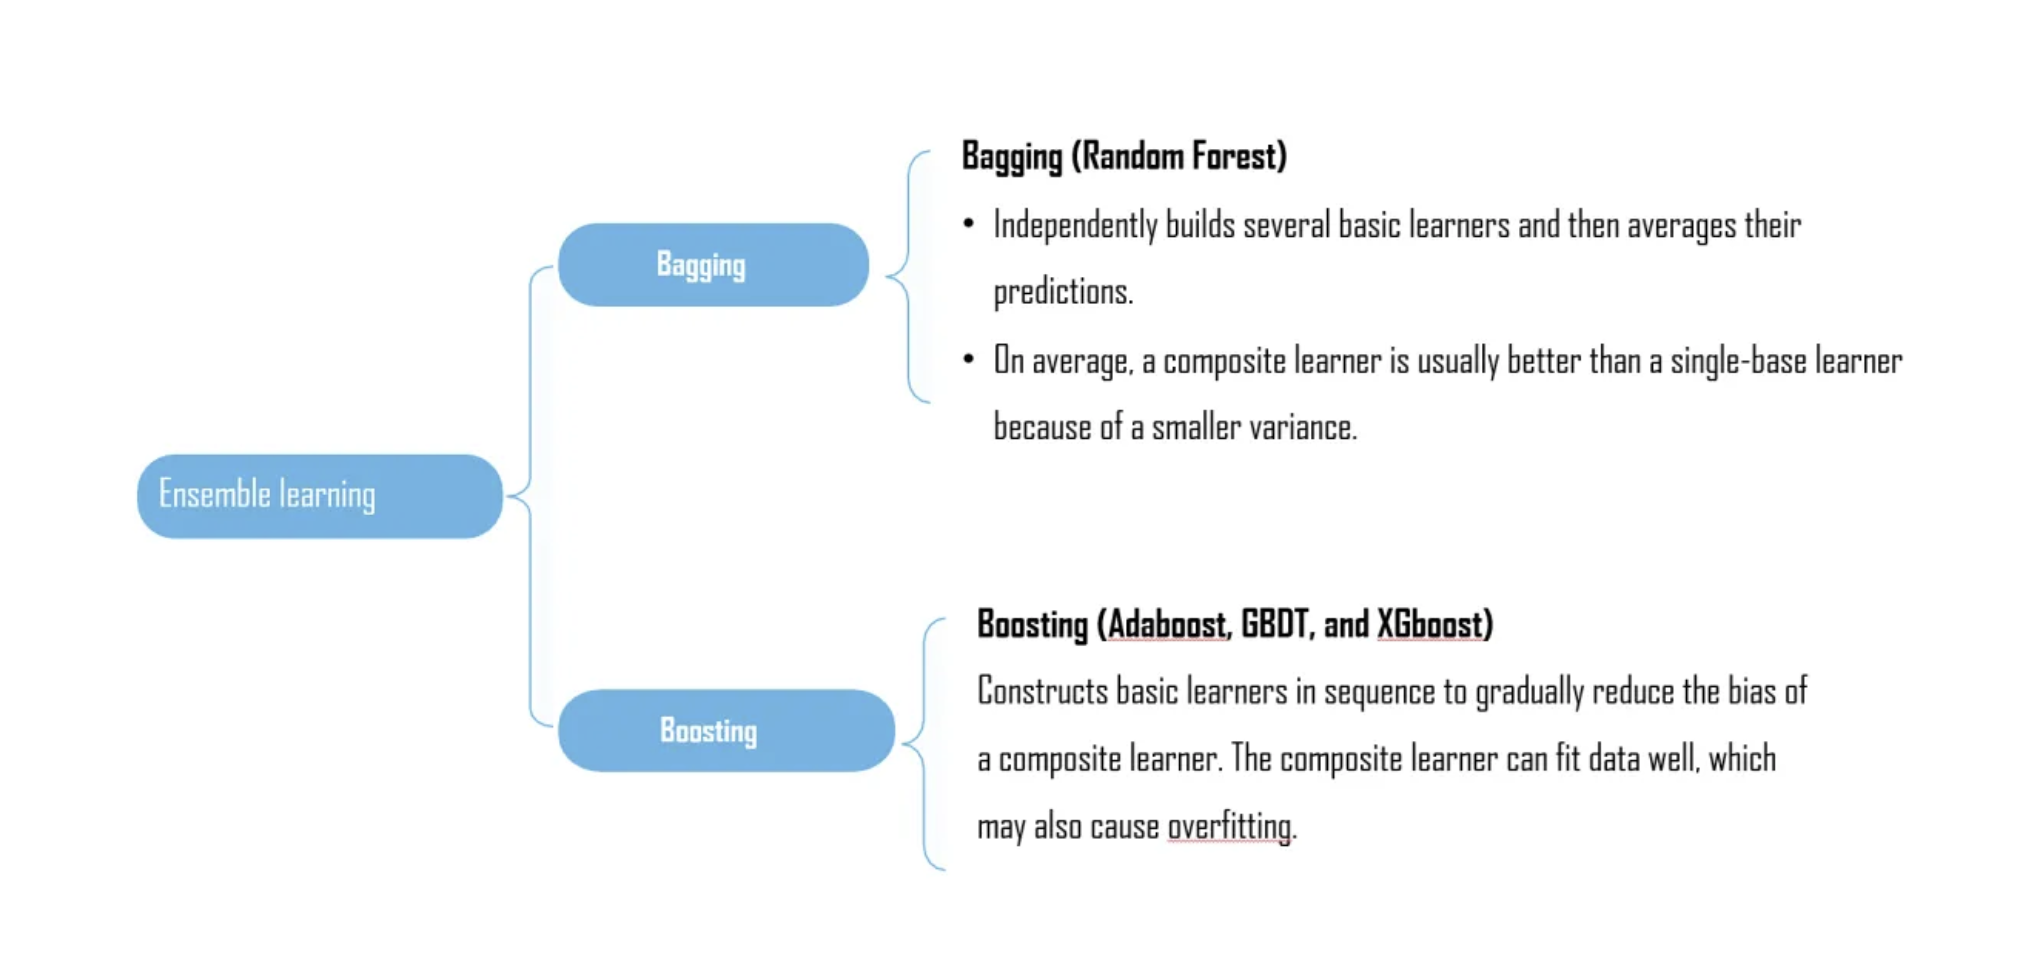

**Types of Essemble Methods**
1. Bagging(Bootstrap Aggregating) : Reduces variance by training models in parallel on different data subsets.
2. Boosting: Reduces bias by training models sequentially, each correcting the errors of its predecessor.

---

## Bagging:
Bagging involves training multiple models independently on different random subsets of the data and combining their predictions to produce a final output. This method helps improve model performance by reducing overfitting and creating a more stable model.


---
### Random Forest

**Random Forest** is an ensemble learning algorithm that constructs multiple decision trees during training and outputs the mode of the classes (for classification) or the mean prediction (for regression) of the individual trees. This approach improves accuracy and controls overfitting compared to a single decision tree.

---
**Working of Random Forest:**

1. **Bootstrap Sampling (Creating Random Datasets)**
    - Randomly pick different subsets of the training data **with replacement**.
    - Each decision tree is trained on its own random subset, so trees are slightly different from each other.
2. **Random Feature Selection (Adding More Randomness)**
    - At each split in a tree, the algorithm considers only a **random subset of features** instead of all features.
    - This reduces similarity between trees and makes the forest stronger.
3. **Building Decision Trees (Grow Trees Independently)**
    - Each tree is grown fully (without pruning).
    - Trees are built **independently**, so the forest has a variety of models.
4. **Making Predictions (Combining Tree Outputs)**
    - **Classification:** Each tree “votes” for a class, and the class with the most votes is chosen.
    - **Regression:** Take the **average** of all tree predictions to get the final result.

---
## Advantages of Random Forest

- **Reduces Overfitting:** By averaging multiple trees, it reduces the risk of overfitting.
- **Handles High Dimensionality:** Effectively manages datasets with a large number of features.
- **Robust to Outliers:** Less sensitive to outliers due to the averaging process.
- **Provides Feature Importance:** Offers insights into the significance of each feature in predictions.

---

## Disadvantages of Random Forest

- **Less Interpretability:** The ensemble nature makes it harder to interpret compared to a single decision tree.
- **Computationally Intensive:** Requires more computational resources and time, especially with large datasets.
- **Slower Predictions:** Making predictions can be slower due to the need to aggregate results from multiple trees.

---
**Application of random forest:**

- **Classification Tasks:** Spam detection, image recognition, medical diagnosis.
- **Regression Tasks:** Stock price prediction, real estate valuation, sales forecasting.

---

**Bias in Bagging:**

- Bias is the error from overly simple models that can’t capture data complexity.
- Bagging doesn’t reduce bias much because if the base models are too simple (like shallow trees), the ensemble still makes systematic errors.

---
**Variance in Bagging:**

- Variance is the model’s sensitivity to changes in the training data.
- Bagging reduces variance by averaging predictions from multiple models trained on different subsets, preventing overfitting.

---
**Takeaway:**

- Bagging mainly **reduces variance**, not bias.
- Low variance helps the model generalize better to new data

---

In [41]:
# Using Random Forest for classification with the Iris dataset:

In [46]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load Iris dataset
iris = load_iris()
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data['target'] = iris.target

# Features and target
X = iris_data[iris.feature_names]
y = iris_data['target']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

# Predict for a single sample
sample = X_test.iloc[0:1]
prediction = rf_classifier.predict(sample)

sample_dict = sample.iloc[0].to_dict()
print(f"\nSample Flower: {sample_dict}")
print(f"Predicted Species: {iris.target_names[prediction[0]]}")
print(f"Actual Species: {iris.target_names[y_test.iloc[0]]}")


Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Sample Flower: {'sepal length (cm)': 6.1, 'sepal width (cm)': 2.8, 'petal length (cm)': 4.7, 'petal width (cm)': 1.2}
Predicted Species: versicolor
Actual Species: versicolor


---
**What does this code do?**
    
- Loads the Iris dataset and selects features (sepal & petal measurements) and the target (species).
- Splits the dataset into training and testing sets.
- Trains a Random Forest Classifier on the training set.
- Makes predictions on the test set.
- Evaluates model performance using accuracy and a classification report (precision, recall, F1-score).
- Predicts the species of a single sample from the test set and compares it with the actual species.

In [47]:
# Using Random Forest for regression with the Iris dataset:

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load Iris dataset
iris = load_iris()
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Features (all except petal length)
X = iris_data.drop('petal length (cm)', axis=1)

# Target (petal length)
y = iris_data['petal length (cm)']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Predict for a single sample
single_sample = X_test.iloc[0].values.reshape(1, -1)
predicted_value = rf_regressor.predict(single_sample)
print(f"\nSingle Sample Features: {X_test.iloc[0].to_dict()}")
print(f"Predicted Petal Length: {predicted_value[0]:.2f}")
print(f"Actual Petal Length: {y_test.iloc[0]:.2f}")


Mean Squared Error: 0.10
R-squared Score: 0.97

Single Sample Features: {'sepal length (cm)': 6.1, 'sepal width (cm)': 2.8, 'petal width (cm)': 1.2}
Predicted Petal Length: 4.19
Actual Petal Length: 4.70


---
**What does this code do?**
    
- Loads the Iris dataset and selects features and a continuous target (petal length).
- Splits data into training and testing sets.
- Trains a Random Forest Regressor on the training set.
- Makes predictions on the test set.
- Evaluates performance using MSE and R² score.
- Predicts a single sample’s petal length and compares it with the actual value.

## Boosting
**Boosting** is an ensemble learning technique that combines multiple weak learners (models that perform slightly better than random guessing) to create a strong learner with improved accuracy. Unlike bagging, which trains models independently, boosting builds models sequentially, each focusing on correcting the errors of its predecessor.

**Example** :

Consider a dataset for spam email classification. Initially, a weak learner might classify 70% of emails correctly. By applying boosting, subsequent models focus on the misclassified emails, gradually improving the overall accuracy to 90% or higher.

---
**Working of Boosting:** 

- **Start with a weak model** – Train a simple model on your data. It will likely make some mistakes.
- **Find the mistakes** – Check which data points the model got wrong.
- **Focus on the hard cases** – Give more importance (weight) to the mistakes so the next model pays more attention to them.
- **Train the next model** – Build a new model that tries to correct the errors of the first model.
- **Repeat** – Keep adding models, each learning from the mistakes of the previous ones.
- **Combine all models** – Merge the predictions of all models to make the final, stronger prediction.

---
**Features of boosting:**

- **Sequential Learning**: Models are trained one after another, each correcting the errors of the previous.
- **Focus on Difficult Cases**: Emphasizes instances that are hard to classify, improving overall accuracy.
- **Weighted Voting**: Final prediction is based on a weighted vote of all models, with more accurate models having higher influence.
- **Overfitting Risk**: While boosting can improve accuracy, it may overfit if not properly tuned, especially with noisy data.

---
## Advantages of Boosting

- **Improved Accuracy**: Combines multiple models to reduce bias and variance, leading to better performance.
- **Flexibility**: Can be applied to both classification and regression problems.
- **Robustness**: Handles various types of data and can model complex relationships.

---

## Limitations of Boosting

- **Overfitting**: If not properly tuned, boosting can overfit the training data.
- **Sensitivity to Noisy Data**: Especially in algorithms like AdaBoost, which may give undue importance to noisy instances.
- **Computational Cost**: Sequential nature makes boosting more computationally intensive compared to parallel methods like bagging.

---

## Types of Boosting Algorithms

1. **AdaBoost (Adaptive Boosting)**
2. **Gradient Boosting**
3. **XGBoost (Extreme Gradient Boosting)**

---


### **AdaBoost (Adaptive Boosting)**


In [61]:
# Code for implementing adaboost by classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base learner
base_learner = DecisionTreeClassifier(max_depth=1)

# Initialize AdaBoost Classifier
ada_classifier = AdaBoostClassifier(
    estimator=base_learner,
    n_estimators=50,
    learning_rate=1,
    random_state=42
)

# Train model
ada_classifier.fit(X_train, y_train)

# Predictions
y_pred = ada_classifier.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.93

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



**What this code does:**

- Loads the **Iris dataset** and separates features (`X`) and target (`y`).
- Splits the dataset into **training and testing sets** (80% train, 20% test).
- Initializes a **Decision Tree Classifier** with `max_depth=1` as the **base learner** (weak learner).
- Creates an **AdaBoost Classifier** using 50 estimators and a learning rate of 1.
- **Trains** the AdaBoost classifier on the training data.
- Makes **predictions** on the test set.
- Evaluates the model’s performance using **accuracy** and a **classification report** (precision, recall, F1-score).

In [63]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = X['petal length (cm)']  # Using petal length as target
X = X.drop('petal length (cm)', axis=1)  # Remaining features

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base learner
base_learner = DecisionTreeRegressor(max_depth=3)

# Initialize AdaBoost Regressor
ada_regressor = AdaBoostRegressor(
    estimator=base_learner,
    n_estimators=50,
    learning_rate=1,
    random_state=42
)

# Train model
ada_regressor.fit(X_train, y_train)

# Predictions
y_pred = ada_regressor.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.2f}")

# Predict a single sample
sample = X_test.iloc[0:1]
prediction = ada_regressor.predict(sample)
print(f"Predicted Petal Length: {prediction[0]:.2f}")
print(f"Actual Petal Length: {y_test.iloc[0]:.2f}")


Root Mean Squared Error: 0.30
Predicted Petal Length: 4.34
Actual Petal Length: 4.70


**What this code does:**

- Loads the **Iris dataset** and selects **petal length** as the target for regression.
- Uses the remaining features (**sepal length, sepal width, petal width**) as predictors.
- Splits the dataset into **training and testing sets** (80% train, 20% test).
- Initializes a **Decision Tree Regressor** as the base learner for AdaBoost.
- Creates an **AdaBoost Regressor** with 50 estimators and a learning rate of 1.
- **Trains** the AdaBoost regressor on the training data.
- Makes **predictions** on the test set.
- Evaluates the model using **Root Mean Squared Error (RMSE)** to measure prediction accuracy.
- Predicts **petal length for a single sample** from the test set and compares it to the actual value."

### **Gradient Boosting**

**Gradient Boosting** is an ensemble machine learning technique that builds a strong predictive model by sequentially combining multiple weak learners (usually shallow decision trees), where each new model focuses on correcting the errors (residuals) made by the previous models. It uses gradient descent to minimize a chosen loss function, improving accuracy iteratively.

**Working of Gradient Boosting:**

1. **Initial Prediction**: Start with a simple model that predicts the average value of the target variable.
2. **Calculate Errors**: Determine the residuals (errors) between the actual and predicted values.
3. **Train New Model**: Fit a new model to predict these residuals.
4. **Update Predictions**: Add the new model's predictions to the existing ones.
5. **Iterate**: Repeat steps 2–4 for a set number of iterations or until improvements plateau.
---
**Advantages**:

- High predictive accuracy.
- Effective for both classification and regression tasks.
- Handles various types of data well, including numerical and categorical.
---
**Disadvantages**:

- Sensitive to noisy data and outliers.
- Computationally intensive and may require more time to train.
- Prone to overfitting if not properly tuned.
---
  
**Key Components**

- **Weak Learners**: Simple models (often shallow decision trees) that perform slightly better than random guessing.
- **Loss Function**: Measures the difference between the actual and predicted values; common choices include mean squared error for regression and log loss for classification.
- **Learning Rate**: Controls the contribution of each new model; a smaller rate means more iterations are needed but can lead to better generalization.
- **Number of Estimators**: The total number of models to train; more estimators can improve performance but may increase the risk of overfitting.
---



In [51]:
# Code for implementing gradient boosting by classification
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = gb_classifier.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

# Predict a single sample
sample = X_test[0:1]  # works for NumPy array
prediction = gb_classifier.predict(sample)
print(f"\nSample Flower: {sample.to_dict(orient='records')[0]}")  # keep as DataFrame if needed
print(f"Predicted Species: {iris.target_names[prediction[0]]}")
print(f"Actual Species: {iris.target_names[y_test[0]]}")  # use [0] instead of .iloc[0]


Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Sample Flower: {'sepal length (cm)': 6.1, 'sepal width (cm)': 2.8, 'petal length (cm)': 4.7, 'petal width (cm)': 1.2}
Predicted Species: versicolor
Actual Species: versicolor


---
**How does the code works:**
- Loads the Iris dataset and separates features (X) and target (y).
- Splits the data into training and testing sets (80% train, 20% test).
- Initializes a Gradient Boosting Classifier with 100 trees (n_estimators) and a learning rate of 0.1.
- Trains the model on the training data.
- Makes predictions on the test set.
- Evaluates the model using accuracy and a classification report (precision, recall, F1-score).
- Predicts a single sample’s species from the test set.
- Prints the sample’s features, the predicted species, and the actual species.

In [54]:
# Code for implementing gradient boosting by regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

SEED = 23

X, y = load_diabetes(return_X_y=True)

train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = SEED)

gbr = GradientBoostingRegressor(loss='absolute_error',
                                learning_rate=0.1,
                                n_estimators=300,
                                max_depth = 1, 
                                random_state = SEED,
                                max_features = 5)

gbr.fit(train_X, train_y)

pred_y = gbr.predict(test_X)

test_rmse = mean_squared_error(test_y, pred_y) ** (1 / 2)

print('Root mean Square error: {:.2f}'.format(test_rmse))

Root mean Square error: 56.39


---
**How does the code works:**
- **Loads the Diabetes dataset** and separates features (`X`) and target (`y`).
- **Splits the data** into training (75%) and testing (25%) sets with a fixed random seed for reproducibility.
- **Initializes a Gradient Boosting Regressor** with:
    - `loss='absolute_error'` for robust regression,
    - `learning_rate=0.1`,
    - `n_estimators=300` trees,
    - `max_depth=1` (shallow trees),
    - `max_features=5` (number of features considered for splits).
- **Trains the model** on the training data.
- **Makes predictions** on the test set.
- **Calculates the Root Mean Squared Error (RMSE)** to evaluate how close the predicted values are to the actual target values.
- **Prints the RMSE**, giving a measure of prediction accuracy.

### **XGBoost (Extreme Gradient Boosting)**

**XGBoost** is an advanced machine learning algorithm that enhances the performance of gradient boosting by introducing regularization techniques, parallel processing, and handling sparse data efficiently. It's widely used for both classification and regression tasks, especially in structured/tabular datasets.

---
**How XGBoost Works**

1. **Start with a Simple Model**: Begin with an initial prediction, often the mean of the target values.
2. **Calculate Residuals**: Determine the difference between actual and predicted values to identify errors.
3. **Build a Decision Tree**: Fit a decision tree to predict these residuals, focusing on the errors made by the initial model.
4. **Update Predictions**: Add the new tree's predictions to the existing model to improve accuracy.
5. **Repeat**: Iteratively add trees, each correcting the errors of the previous ones, until a predefined number of trees is reached or performance plateaus.
---
**Key Features of XGBoost**

- **Regularization**: Incorporates L1 (Lasso) and L2 (Ridge) regularization to prevent overfitting.
- **Parallel Processing**: Utilizes multiple cores for faster computation during training.
- **Handling Missing Values**: Automatically deals with missing data without requiring imputation.
- **Tree Pruning**: Employs a depth-first approach to grow trees, allowing for more complex models.
- **Cross-Validation**: Supports built-in cross-validation to assess model performance during training.

---
**Advantages:**

- Fast and efficient, handles large datasets well.
- Supports parallel processing and GPU acceleration.
- Tunable parameters and regularization to improve performance.
- Can show feature importance for better insights.
- Widely used and supported in multiple programming languages.

---
**Disadvantages:**

- Can be heavy on computation and memory.
- Sensitive to noisy data and outliers.
- May overfit on small datasets or with too many trees.
- Harder to interpret compared to simpler models.

In [53]:
# Code for implementing XGBoost classification
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


---
**What does the code do**
- **Loads the Iris dataset** and separates features (`X`) and target (`y`).
- **Splits the data** into training (80%) and testing (20%) sets.
- **Initializes an XGBoost Classifier** with `use_label_encoder=False` and `eval_metric='mlogloss'`.
- **Trains the XGBoost model** on the training data.
- **Makes predictions** on the test set.
- **Evaluates the model** using accuracy and prints it.

In [64]:
# Code for implementing XGBoost regression
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = X['petal length (cm)']  # Predict petal length
X = X.drop('petal length (cm)', axis=1)  # Remaining features

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Regressor
xgb_reg = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train model
xgb_reg.fit(X_train, y_train)

# Predictions
y_pred = xgb_reg.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.2f}")

# Predict a single sample
sample = X_test.iloc[0:1]
prediction = xgb_reg.predict(sample)
print(f"Predicted Petal Length: {prediction[0]:.2f}")
print(f"Actual Petal Length: {y_test.iloc[0]:.2f}")


Root Mean Squared Error: 0.37
Predicted Petal Length: 4.06
Actual Petal Length: 4.70


**What this code does:**

- **Loads the Iris dataset** and selects features.
- **Uses `petal length (cm)` as the target** (continuous value) for regression.
- **Splits the dataset** into training and testing sets (80% train, 20% test).
- **Initializes an XGBoost Regressor** with 100 trees (`n_estimators`) and a learning rate of 0.1.
- **Trains the model** on the training data.
- **Makes predictions** on the test set.
- **Evaluates the model** using Root Mean Squared Error (RMSE) to measure how close the predictions are to the actual values.
- **Predicts the petal length for a single sample** and compares it with the actual value.

## Hands-on

### Compare Ridge vs Lasso on same dataset

In [66]:
# Compare Ridge vs Lasso on same dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = X['petal length (cm)']  # Target
X = X.drop('petal length (cm)', axis=1)  # Remaining features

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Ridge and Lasso
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

# Train models
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# Predictions
ridge_pred = ridge.predict(X_test)
lasso_pred = lasso.predict(X_test)

# Evaluate
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))

print("Ridge Coefficients:", ridge.coef_)
print("Lasso Coefficients:", lasso.coef_)
print(f"Ridge RMSE: {ridge_rmse:.2f}")
print(f"Lasso RMSE: {lasso_rmse:.2f}")


Ridge Coefficients: [ 0.73831951 -0.62706315  1.43454589]
Lasso Coefficients: [ 0.51844043 -0.10251673  1.58636102]
Ridge RMSE: 0.36
Lasso RMSE: 0.42


---
**What this code does:**

- Loads the **Iris dataset** and sets **petal length** as the target variable for regression.
- Splits the data into **training** and **testing** sets.
- Initializes **Ridge** (L2 regularization) and **Lasso** (L1 regularization) regression models.
- Trains both models on the training data.
- Makes predictions on the test data using both models.
- Computes **Root Mean Squared Error (RMSE)** for both models to evaluate prediction performance.
- Prints the **coefficients** of each model to see how L1 and L2 regularization affect feature weights.

**Key points:**

- **Ridge** shrinks coefficients but usually keeps all features.
- **Lasso** can shrink some coefficients to **zero**, effectively performing feature selection.
- RMSE helps compare which model predicts better on the test data.

### Train a Random Forest and check feature importance

             Feature  Importance
2  petal length (cm)    0.439994
3   petal width (cm)    0.421522
0  sepal length (cm)    0.108098
1   sepal width (cm)    0.030387


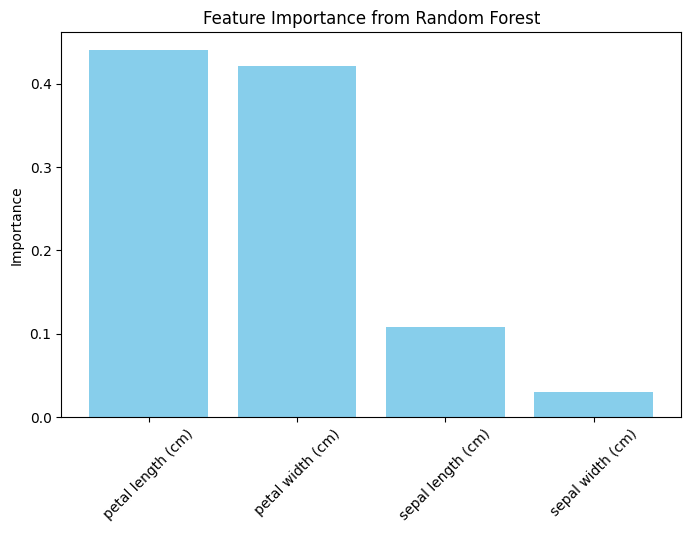

In [69]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(8,5))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.title('Feature Importance from Random Forest')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


**What this code does:**

- Loads the **Iris dataset** and separates features (`X`) and target (`y`).
- Splits the data into **training** and **testing** sets.
- Initializes a **Random Forest Classifier** with 100 trees and trains it on the training data.
- Extracts **feature importances** from the trained Random Forest model.
- Creates a **DataFrame** to display features and their importance scores, sorted from most to least important.
- **Prints** the feature importance table.
- **Plots** a bar chart showing the importance of each feature to visualize which features contribute most to classification.

This helps identify which features the model considers most relevant for predicting the Iris species.

## Maths Focus

### Regularization penalty terms
**Regularization** is a technique used in machine learning to **prevent overfitting** by adding a penalty to the model’s complexity (i.e., large weights).

**Types of Regularization Penalty Terms:**

1. **L1 Regularization (Lasso)**
    - Adds the **absolute values of weights** to the loss function.
    - Formula: `Loss + α * Σ|weights|`
    - **Effect:** Can shrink some weights to **zero**, effectively performing feature selection.
2. **L2 Regularization (Ridge)**
    - Adds the **squared values of weights** to the loss function.
    - Formula: `Loss + α * Σ(weights²)`
    - **Effect:** Shrinks weights **but rarely to zero**, keeping all features but smaller in influence.

**Summary:**
- **L1 → sparsity, feature selection**
- **L2 → smooth weights, reduces overfitting**
- Both help the model **generalize better** to unseen data
